In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import shapely.geometry as sgeom

In [2]:
stamen_terrain = cimgt.Stamen('terrain-background')
plt.rcParams["font.family"] = "serif"
box_props = dict(facecolor='#EFDBB2',
                 alpha=0.4,
                 boxstyle='round')
box_props2 = dict(facecolor='#C7C9C7',
                  alpha=0.3,
                  boxstyle='round')

In [3]:
clpx = gpd.read_file('../../figs/fig_spatial_data/clpx_dem_outline.shp')
clpx_wgs = clpx.to_crs({'init': 'epsg:4326'})
hv = gpd.read_file('../../figs/fig_spatial_data/hv_dem_outline.shp')
hv_wgs = hv.to_crs({'init': 'epsg:4326'})
hv_st = hv.to_crs(stamen_terrain.crs.proj4_init)
clpx_st = clpx.to_crs(stamen_terrain.crs.proj4_init)

map_extent = (-149.5, -148.6, 68.4, 69.3)
axes_extent = (0.6, 0.13, 0.35, 0.35)
extent_box = sgeom.box(map_extent[0],
                       map_extent[2],
                       map_extent[1],
                       map_extent[3])

In [4]:
def add_insetmap(axes_extent, map_extent):
    # create new axes, set its projection    
    use_projection = stamen_terrain.crs
    geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
    sub_ax = plt.axes(axes_extent, projection=use_projection)  # normal units
    sub_ax.set_extent(map_extent, geodetic)  # map extents
    # add basic land, coastlines of the map
    sub_ax.add_image(stamen_terrain, 8)
    sub_ax.set_title("Field Areas", y=0.9)
    return sub_ax

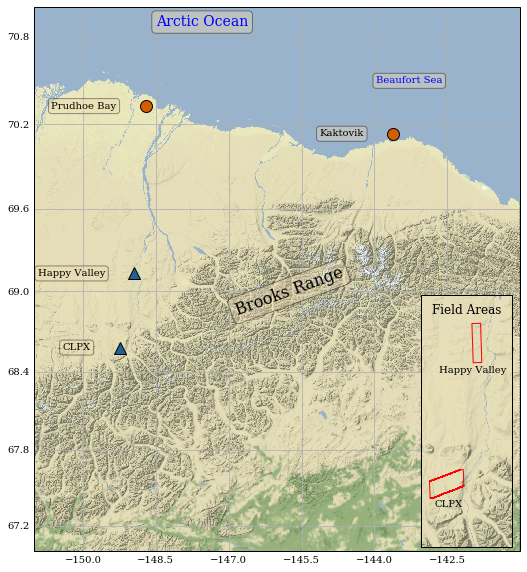

In [6]:
fig = plt.figure(figsize=(10,10))
# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1,
                     projection=stamen_terrain.crs)
# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-151, -141, 67, 71], crs=ccrs.Geodetic())
# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform,
                             units='dots', x=-29)
# Add map markers
# HV
ax.plot(-148.944722, 69.131944,
        marker='^', color='#236192',
        markeredgecolor='k', markersize=12,
        transform=ccrs.Geodetic())
# CLPX
ax.plot(-149.243611, 68.581389,
        marker='^', color='#236192',
        markeredgecolor='k', markersize=12,
        transform=ccrs.Geodetic())
# Kaktovik
ax.plot(-143.616111, 70.132778, marker='o', color='#D45D00',
        markeredgecolor='k', markersize=12,
        transform=ccrs.Geodetic())
# Prudhoe Bay
ax.plot(-148.711389, 70.325556, marker='o', color='#D45D00',
        markeredgecolor='k', markersize=12,
        transform=ccrs.Geodetic())

#Add text 25 pixels to the left of the coords.
ax.text(-148.944722, 69.131944, u'Happy Valley',
        verticalalignment='center',
        horizontalalignment='right',
        transform=text_transform,
        bbox=box_props)

ax.text(-149.243611, 68.581389, u'CLPX',
        verticalalignment='center',
        horizontalalignment='right',
        transform=text_transform,
        bbox=box_props)

ax.text(-146, 70.9, u'Arctic Ocean',
        verticalalignment='center',
        horizontalalignment='right',
        color='blue',
        size=14,
        transform=text_transform,
        bbox=box_props)

ax.text(-142, 70.5, u'Beaufort Sea',
        verticalalignment='center',
        horizontalalignment='right',
        color='blue',
        transform=text_transform,
        bbox=box_props)

ax.text(-143.616111, 70.132778, u'Kaktovik',
        verticalalignment='center',
        horizontalalignment='right',
        transform=text_transform,
        bbox=box_props)

ax.text(-148.711389, 70.325556, u'Prudhoe Bay',
        verticalalignment='center',
        horizontalalignment='right',
        transform=text_transform,
        bbox=box_props)

ax.text(-144, 69, u'Brooks Range',
        verticalalignment='center',
        horizontalalignment='right',
        rotation=20,
        size=16,
        transform=text_transform,
        bbox=box_props)

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

###

inset = add_insetmap(axes_extent, map_extent)
inset.add_geometries(hv_st.geometry,
                     stamen_terrain.crs,
                     edgecolor='red',
                     facecolor='None')
inset.add_geometries(clpx_st.geometry,
                     stamen_terrain.crs,
                     edgecolor='red',
                     facecolor='None')

inset.text(0.15, 0.17, 'CLPX',
           transform=inset.transAxes,
           verticalalignment='center')

inset.text(0.2, 0.7, 'Happy Valley',
           transform=inset.transAxes,
           verticalalignment='center')

plt.savefig('field_fig.png',dpi=300,bbox_inches='tight')

In [ ]:
stamen_terrain.crs